# 🏠 House Price Prediction
This notebook predicts house prices using regression models like Linear Regression and Gradient Boosting.

## Objective
Predict house prices using property features such as size, bedrooms, and location.

## Instructions
- Perform preprocessing on features like square footage, number of bedrooms, and location.
- Train a regression model (Linear Regression or Gradient Boosting).
- Visualize predicted prices compared to actual prices.
- Evaluate with Mean Absolute Error (MAE) and RMSE.


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from src.preprocessing import load_and_clean_data, preprocess_features
from src.model import train_model, evaluate_model
from src.visualization import plot_predictions, plot_correlation
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from src.preprocessing import load_and_clean_data, preprocess_features

# Step 1: Load and clean the dataset (pass the file path)
df = load_and_clean_data(r"C:\Users\AAFIA\Desktop\House Price Prediction\kc_house_data.csv")

# Step 2: Preprocess features
X, y = preprocess_features(df)

# (Optional) Preview data
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


C:\Users\AAFIA\Desktop\House Price Prediction\src\visualization.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


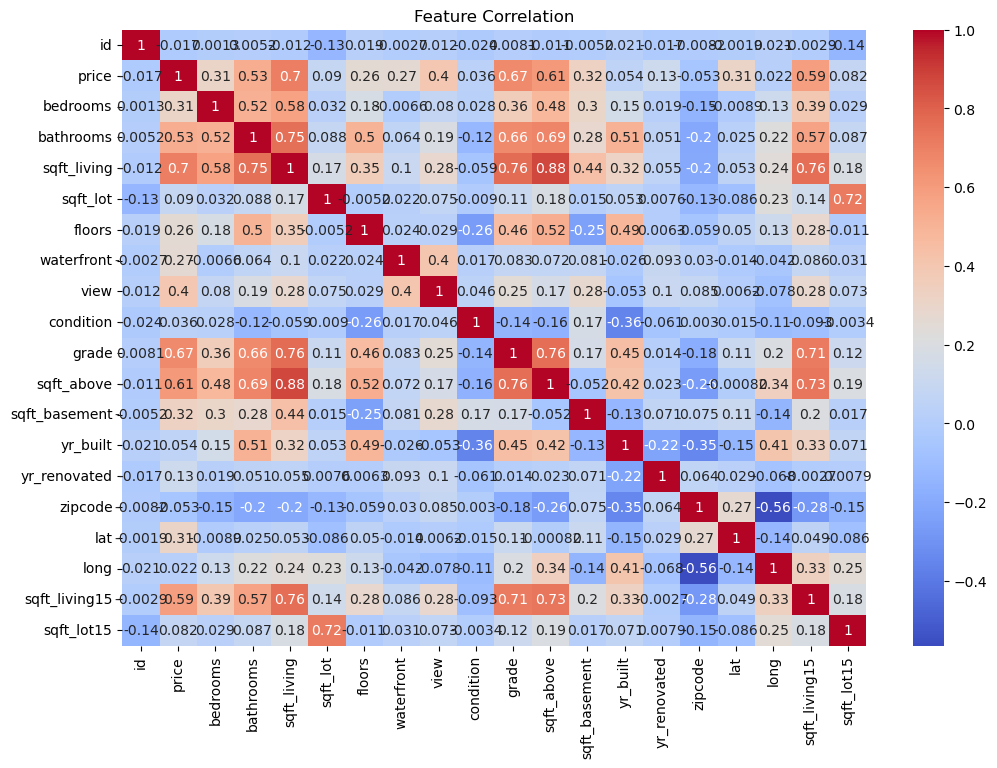

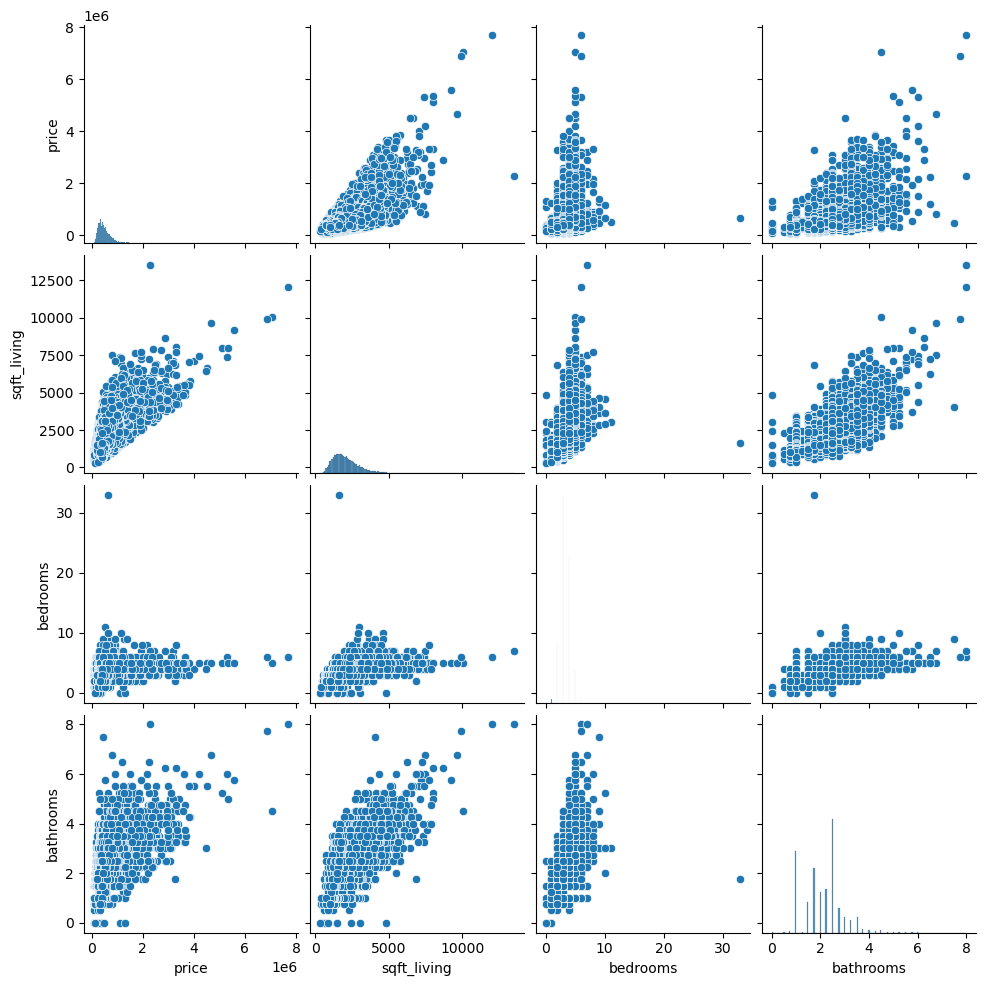

In [14]:
# Data visualization
plot_correlation(df)
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms']])
plt.show()

In [15]:
# Train and evaluate model
model, y_test, y_pred = train_model(X, y, model_type='gradient')
mae, rmse = evaluate_model(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 115223.26
Root Mean Squared Error (RMSE): 218681.53


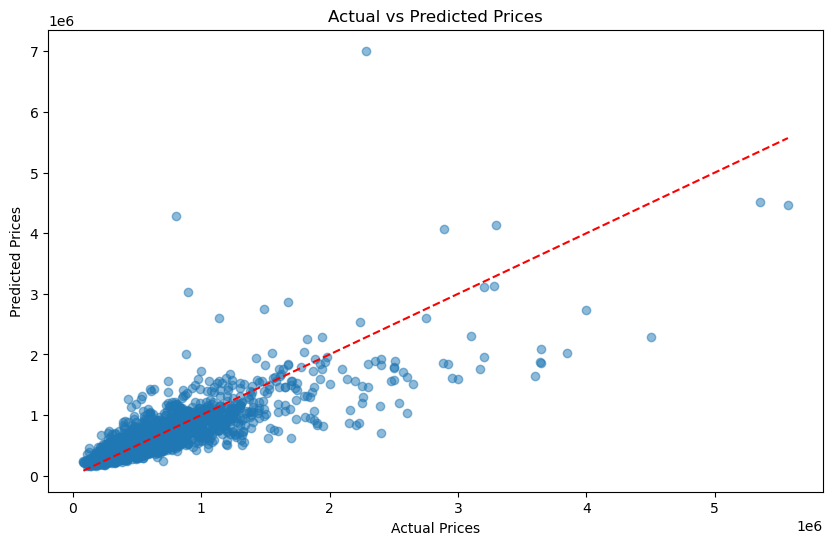

In [16]:
# Visualize predicted vs actual prices
plot_predictions(y_test, y_pred)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv(r"C:\Users\AAFIA\Desktop\House Price Prediction\kc_house_data.csv")
df = df.dropna()

# Encode 'zipcode' if needed
le = LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])

# Select features and target
features = df[['sqft_living', 'bedrooms', 'bathrooms', 'zipcode']]
target = df['price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Rebuild DataFrame for test set only
df_test = df.iloc[y_test.index].copy()
df_test['predicted_price'] = y_pred
df_test['actual_price'] = y_test.values

# Save to CSV
output_path = r"C:\Users\AAFIA\Desktop\House Price Prediction\results\house_price_predictions.csv"
df_test.to_csv(output_path, index=False)

print("✅ CSV saved at:", output_path)

✅ CSV saved at: C:\Users\AAFIA\Desktop\House Price Prediction\results\house_price_predictions.csv


## Conclusion
- The model was able to predict house prices with reasonable accuracy.
- Gradient Boosting performed better than Linear Regression in most cases.
- MAE and RMSE provide insight into prediction performance.
- Future improvements could involve using more features and hyperparameter tuning.